# LIBRERIE

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import balanced_accuracy_score

# DATASET e OPERAZIONI SUL DATASET

leggo i dataset

In [2]:
airline_train = pd.read_csv("/Users/emanuele/Desktop/Machine Learning/ProgettoML/airline-train.csv")
airline_test = pd.read_csv("/Users/emanuele/Desktop/Machine Learning/ProgettoML/airline-test.csv")
df_train = airline_train
df_test = airline_test

In [3]:
print('df_test:',df_test.shape,'df_train:',df_train.shape)

df_test: (25976, 25) df_train: (103904, 25)


unisco i dataset

In [4]:
df=df_train
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


trasformo in categoiche le collonne non numeriche 

scritto:
The column corresponding to the Arrival Delay in Minutes feature has 310 missing values.
The first two features are useless and will not affect the classification, so you should get rid of them.
Many columns contain categorical values but are of type 'object' or 'int64'. Let's replace this type with a special one designed for storing categorical values.

In [5]:
df = df.drop(df.iloc[:,[0, 1]], axis = 1)

categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df.iloc[:,categorical_indexes] = df.iloc[:,categorical_indexes].astype('category')


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype   
---  ------                             --------------   -----   
 0   Gender                             103904 non-null  category
 1   Customer Type                      103904 non-null  category
 2   Age                                103904 non-null  int64   
 3   Type of Travel                     103904 non-null  category
 4   Class                              103904 non-null  category
 5   Flight Distance                    103904 non-null  int64   
 6   Inflight wifi service              103904 non-null  category
 7   Departure/Arrival time convenient  103904 non-null  category
 8   Ease of Online booking             103904 non-null  category
 9   Gate location                      103904 non-null  category
 10  Food and drink                     103904 non-null  category
 11  Online boarding           

trovo i valori mancanti

In [6]:
df.isna().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

sostituisco i valori mancanti con la media della colonna 

scritto:Fill in the missing values with medians in the columns corresponding to quantitative features:

In [7]:
df['Arrival Delay in Minutes'].fillna(df['Arrival Delay in Minutes'].median(axis = 0), inplace = True)
df.isna().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

We divide the signs into quantitative and categorical:

In [8]:
numerical_columns = [feature for feature in df.columns if df[feature].dtype.name != 'category']
numerical_columns.remove('satisfaction')
categorical_columns = [feature for feature in df.columns if df[feature].dtype.name == 'category']
data_describe = df.describe(include = ['category'])

print('-'*40)
print('Number of categorical variables: ',len(categorical_columns))
print('-'*40)
print('Categorical variables column name:',categorical_columns)
print(' '*40)
print('-'*40)
print('Number of numerical variables: ', len(numerical_columns))
print('-'*40)
print('Numerical Variables Column: ',numerical_columns)

----------------------------------------
Number of categorical variables:  18
----------------------------------------
Categorical variables column name: ['Gender', 'Customer Type', 'Type of Travel', 'Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']
                                        
----------------------------------------
Number of numerical variables:  4
----------------------------------------
Numerical Variables Column:  ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']


We divide categorical features into binary and non-binary:

In [9]:
binary_columns = [columns for columns in categorical_columns if data_describe[columns]['unique'] == 2]
nonbinary_columns = [columns for columns in categorical_columns if data_describe[columns]['unique'] > 2]

print('-'*40)
print('Binary Columns: ',len(binary_columns))
print('-'*40)
print('Binary Columns name:',binary_columns)
print(' '*40)
print('-'*40)
print('Non-Binary Columns: ', len(nonbinary_columns))
print('-'*40)
print('Non-Binary Columns name: ',nonbinary_columns)

----------------------------------------
Binary Columns:  3
----------------------------------------
Binary Columns name: ['Gender', 'Customer Type', 'Type of Travel']
                                        
----------------------------------------
Non-Binary Columns:  15
----------------------------------------
Non-Binary Columns name:  ['Class', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness']


trasformo le colonne binarie in maniera numerica

In [10]:
for col in binary_columns:
    df[col] = df[col].astype('object')
    k = 0
    for uniq in df[col].unique():
        df.at[df[col] == uniq, col] = k
        k +=1 

df

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,0,13,0,Eco Plus,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,0,1,25,1,Business,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,1,0,26,1,Business,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,1,0,25,1,Business,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,0,0,61,1,Business,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,1,1,23,1,Eco,192,2,1,2,3,...,2,3,1,4,2,3,2,3,0.0,neutral or dissatisfied
103900,0,0,49,1,Business,2347,4,4,4,4,...,5,5,5,5,5,5,4,0,0.0,satisfied
103901,0,1,30,1,Business,1995,1,1,1,3,...,4,3,2,4,5,5,4,7,14.0,neutral or dissatisfied
103902,1,1,22,1,Eco,1000,1,1,1,5,...,1,4,5,1,5,4,1,0,0.0,neutral or dissatisfied


scritto:the following vectorization method is applicable to non-binary features:

The feature j, which takes s values, will be replaced by s features, which take the values 0 or 1, depending on what the value of the original feature j is.

This vectorization is carried out by the get_dummies method:

In [ ]:
print(df)

In [11]:
df_nonbinary = pd.get_dummies(df[nonbinary_columns])
print(df_nonbinary.columns)

Index(['Class_Business', 'Class_Eco', 'Class_Eco Plus',
       'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online board

standardizazione

In [12]:
df_numerical = df[numerical_columns]
df_numerical.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [13]:
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
scaled_columns = SS.fit_transform(df_numerical)
scaled_columns = pd.DataFrame(scaled_columns)
scaled_columns.columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']

df_numerical = scaled_columns

df_numerical.head()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
0,-1.745279,-0.731539,0.266393,0.074169
1,-0.951360,-0.957184,-0.361375,-0.236313
2,-0.885200,-0.047584,-0.387532,-0.391554
3,-0.951360,-0.629246,-0.099805,-0.158692
4,1.430397,-0.978244,-0.387532,-0.391554


In [14]:
target = df['satisfaction']
data = pd.concat((df_numerical, df_nonbinary, df[binary_columns]), axis = 1)
print(data.shape)
data.describe()

(103904, 93)


,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_2,Inflight service_3,Inflight service_4,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5
count,1.039040e+05,1.039040e+05,1.039040e+05,1.039040e+05,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,-2.821431e-15,1.029401e-16,-1.153198e-16,-2.945899e-16,0.477989,0.449886,0.072124,0.029864,0.171697,0.248595,...,0.110265,0.195363,0.365193,0.260972,0.000115,0.128176,0.155259,0.236507,0.261578,0.218365
std,1.000005e+00,1.000005e+00,1.000005e+00,1.000005e+00,0.499518,0.497485,0.258695,0.170213,0.377119,0.432200,...,0.313222,0.396482,0.481487,0.439167,0.010746,0.334287,0.362153,0.424939,0.439496,0.413138
min,-2.142239e+00,-1.161768e+00,-3.875318e-01,-3.915538e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.190404e-01,-7.776706e-01,-3.875318e-01,-3.915538e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.103858e-02,-3.474412e-01,-3.875318e-01,-3.915538e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.687977e-01,5.551379e-01,-7.364806e-02,-5.519832e-02,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,3.018235e+00,3.804423e+00,4.125438e+01,4.059206e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
target.replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
target.head()

0    0
1    0
2    1
3    0
4    1
Name: satisfaction, dtype: int64

# ANALYSIS

In [9]:
df.describe()

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes
count,103904.000000,103904.000000,103904.000000,103904.000000
mean,39.379706,1189.448375,14.815618,15.133392
std,15.114964,997.147281,38.230901,38.649776
min,7.000000,31.000000,0.000000,0.000000
25%,27.000000,414.000000,0.000000,0.000000
50%,40.000000,843.000000,0.000000,0.000000
75%,51.000000,1743.000000,12.000000,13.000000
max,85.000000,4983.000000,1592.000000,1584.000000


In [10]:
df.describe(include = ['category'])

,Gender,Customer Type,Type of Travel,Class,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness
count,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904,103904
unique,2,2,2,3,6,6,6,6,6,6,6,6,6,6,5,6,6,6
top,Female,Loyal Customer,Business travel,Business,3,4,3,3,4,4,4,4,4,4,4,4,4,4
freq,52727,84923,71655,49665,25868,25546,24449,28577,24359,30762,31765,29423,30867,28789,37383,29055,37945,27179


In [35]:
pie_satisfaction = px.pie(df.satisfaction.value_counts(), values='satisfaction', 
    names=["Neutral or dissatisfied", "Satisfied"], color_discrete_sequence= ['#b30000','#00b300'])
pie_satisfaction.show()

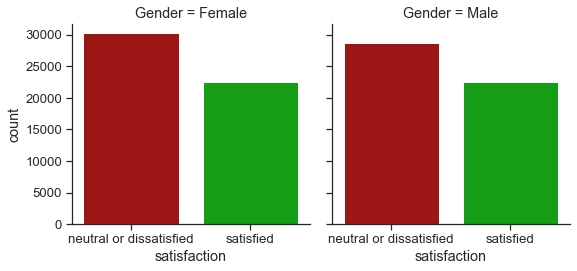

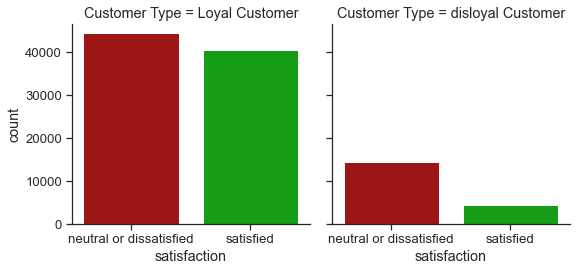

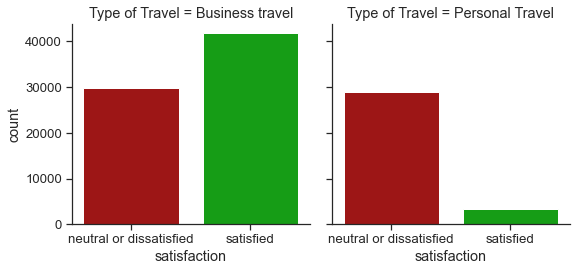

In [30]:
with sns.axes_st                      dsfdsaaa


adasuidghiashduasadsadsfdsgadsghfdgdfdffgfxdfsafdasfsadfyle(style='ticks'):
    barPlot = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=df, kind="count", height=4, aspect=1,palette = ['#b30000','#00b300'])  
    barPlot = sns.catplot("satisfaction", col="Customer Type", col_wrap=2, data=df, kind="count", height=4, aspect=1,palette = ['#b30000','#00b300'])
    barPlot = sns.catplot("satisfaction", col="Type of Travel", col_wrap=2, data=df, kind="count", height=4, aspect=1,palette = ['#b30000','#00b300'])

Dalle visualizzazioni e dagli approfondimenti, alcuni punti sono chiari:

Il genere non gioca un ruolo importante nella soddisfazione, poiché uomini e donne sembrano ugualmente preoccupati per gli stessi fattori

Il numero di clienti fedeli per questa compagnia aerea è alto, tuttavia, il livello di insoddisfazione è alto indipendentemente dalla fedeltà. La compagnia aerea dovrà lavorare per mantenere i clienti fedeli

I viaggiatori d'affari sembrano essere più soddisfatti del volo rispetto ai viaggiatori personali

Le persone in business class sembrano essere le più soddisfatte e quelle in classe economica sono meno soddisfatte

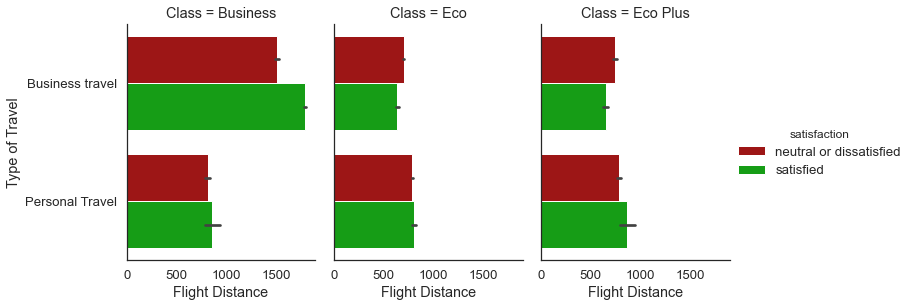

In [37]:
with sns.axes_style('white'):
    barPlot = sns.catplot(x="Flight Distance", y="Type of Travel", hue="satisfaction",
     col="Class", data=df, kind="bar", height=4.5, aspect=.8,palette = ['#b30000','#00b300'])

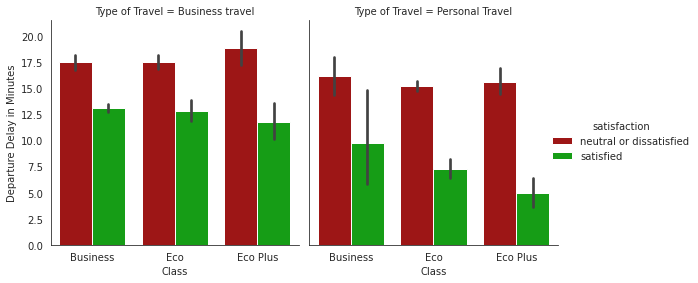

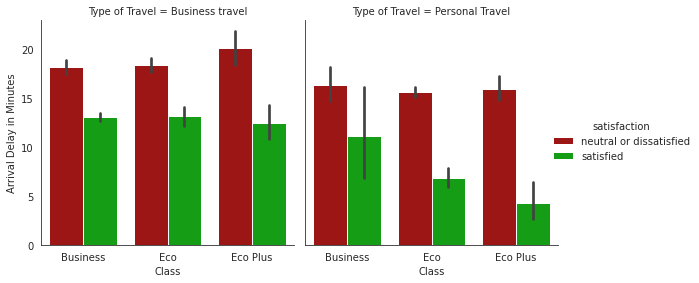

In [18]:
with sns.axes_style('white'):
    barPlot = sns.catplot(x="Class", y="Departure Delay in Minutes", hue="satisfaction", col="Type of Travel", 
    data=df, kind="bar", height=4, aspect=1,palette = ['#b30000','#00b300'])
    barPlot = sns.catplot(x="Class", y="Arrival Delay in Minutes", hue="satisfaction", col="Type of Travel", 
    data=df, kind="bar", height=4, aspect=1,palette = ['#b30000','#00b300'])

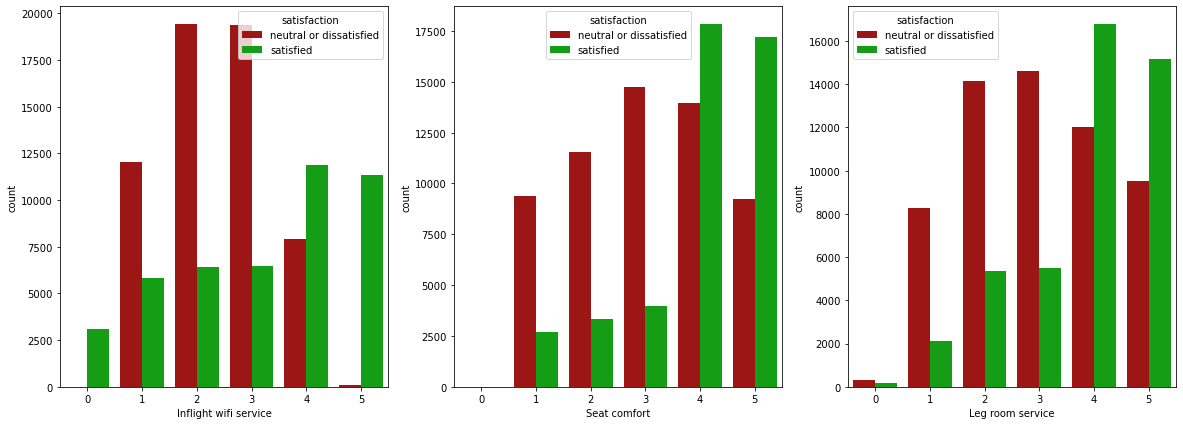

In [35]:


f, ax = plt.subplots(1, 3, figsize = (20,7))
sns.countplot(x = 'Inflight wifi service', hue = 'satisfaction', palette = ['#b30000','#00b300'], data = df, ax = ax[0])
sns.countplot(x = 'Seat comfort', hue = 'satisfaction', palette = ['#b30000','#00b300'], data = df, ax = ax[1])
sns.countplot(x = 'Leg room service', hue = 'satisfaction', palette = ['#b30000','#00b300'], data = df, ax = ax[2])
plt.show()

# MODELLI

In [16]:
#trasformazione colonne categoriche
df_test = df_test.drop(df_test.iloc[:,[0, 1]], axis = 1)
categorical_indexes = [0, 1, 3, 4] + list(range(6, 20))
df_test.iloc[:,categorical_indexes] = df_test.iloc[:,categorical_indexes].astype('category')

#gestione dei NA
df_test['Arrival Delay in Minutes'].fillna(df_test['Arrival Delay in Minutes'].median(axis = 0), inplace = True)

#divisione colonne categoriche e quantitative
numerical_columns_test = [feature for feature in df_test.columns if df_test[feature].dtype.name != 'category']
numerical_columns_test.remove('satisfaction')
categorical_columns_test= [feature for feature in df_test.columns if df_test[feature].dtype.name == 'category']
data_describe_test = df_test.describe(include = ['category'])

    #dicisione colonne binarie e non
binary_columns_test = [columns for columns in categorical_columns_test if data_describe_test[columns]['unique'] == 2]
nonbinary_columns_test = [columns for columns in categorical_columns_test if data_describe_test[columns]['unique'] > 2]

for col in binary_columns_test:
    df_test[col] = df_test[col].astype('object')
    k = 0
    for uniq in df_test[col].unique():
        df_test.at[df_test[col] == uniq, col] = k
        k +=1 
    
df_nonbinary_test = pd.get_dummies(df_test[nonbinary_columns_test])

df_numerical_test = df_test[numerical_columns_test]

SS = StandardScaler()
scaled_columns_test = SS.fit_transform(df_numerical_test)
scaled_columns_test = pd.DataFrame(scaled_columns_test)
scaled_columns_test.columns = ['Age', 'Flight Distance', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
df_numerical_test = scaled_columns_test

target_test = df_test['satisfaction']
data_test = pd.concat((df_numerical_test, df_nonbinary_test, df_test[binary_columns_test]), axis = 1)

target_test.replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)
data_test

,Age,Flight Distance,Departure Delay in Minutes,Arrival Delay in Minutes,Class_Business,Class_Eco,Class_Eco Plus,Inflight wifi service_0,Inflight wifi service_1,Inflight wifi service_2,...,Inflight service_5,Cleanliness_0,Cleanliness_1,Cleanliness_2,Cleanliness_3,Cleanliness_4,Cleanliness_5,Gender,Customer Type,Type of Travel
0,0.817887,-1.035171,0.953810,0.782208,0,1,0,0,0,0,...,1,0,0,0,0,0,1,0,0,0
1,-0.239238,1.671443,-0.382286,-0.392188,1,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
2,-1.296363,-1.003128,-0.382286,-0.392188,0,1,0,0,0,1,...,0,0,0,1,0,0,0,1,1,0
3,0.289325,2.186131,-0.382286,-0.232043,1,0,0,1,0,0,...,0,0,0,0,0,1,0,1,0,0
4,0.619676,-0.011804,-0.382286,0.141628,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25971,-0.371378,-0.668681,-0.382286,-0.392188,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,1,0
25972,-1.098152,-0.548521,-0.382286,-0.392188,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0
25973,-1.494573,-0.366278,-0.382286,-0.392188,0,1,0,0,0,1,...,0,0,0,1,0,0,0,0,0,1
25974,-1.692784,-0.066878,-0.382286,-0.392188,1,0,0,0,0,0,...,1,0,0,0,0,1,0,1,0,0


In [17]:
data_test['Gate location_0'] = 0
data_test['Seat comfort_0'] = 0
data_test['Checkin service_0'] = 0

In [18]:
data_test = data_test.loc[:, ['Age', 'Flight Distance', 'Departure Delay in Minutes',
       'Arrival Delay in Minutes', 'Class_Business', 'Class_Eco',
       'Class_Eco Plus', 'Inflight wifi service_0', 'Inflight wifi service_1',
       'Inflight wifi service_2', 'Inflight wifi service_3',
       'Inflight wifi service_4', 'Inflight wifi service_5',
       'Departure/Arrival time convenient_0',
       'Departure/Arrival time convenient_1',
       'Departure/Arrival time convenient_2',
       'Departure/Arrival time convenient_3',
       'Departure/Arrival time convenient_4',
       'Departure/Arrival time convenient_5', 'Ease of Online booking_0',
       'Ease of Online booking_1', 'Ease of Online booking_2',
       'Ease of Online booking_3', 'Ease of Online booking_4',
       'Ease of Online booking_5', 'Gate location_0', 'Gate location_1',
       'Gate location_2', 'Gate location_3', 'Gate location_4',
       'Gate location_5', 'Food and drink_0', 'Food and drink_1',
       'Food and drink_2', 'Food and drink_3', 'Food and drink_4',
       'Food and drink_5', 'Online boarding_0', 'Online boarding_1',
       'Online boarding_2', 'Online boarding_3', 'Online boarding_4',
       'Online boarding_5', 'Seat comfort_0', 'Seat comfort_1',
       'Seat comfort_2', 'Seat comfort_3', 'Seat comfort_4', 'Seat comfort_5',
       'Inflight entertainment_0', 'Inflight entertainment_1',
       'Inflight entertainment_2', 'Inflight entertainment_3',
       'Inflight entertainment_4', 'Inflight entertainment_5',
       'On-board service_0', 'On-board service_1', 'On-board service_2',
       'On-board service_3', 'On-board service_4', 'On-board service_5',
       'Leg room service_0', 'Leg room service_1', 'Leg room service_2',
       'Leg room service_3', 'Leg room service_4', 'Leg room service_5',
       'Baggage handling_1', 'Baggage handling_2', 'Baggage handling_3',
       'Baggage handling_4', 'Baggage handling_5', 'Checkin service_0',
       'Checkin service_1', 'Checkin service_2', 'Checkin service_3',
       'Checkin service_4', 'Checkin service_5', 'Inflight service_0',
       'Inflight service_1', 'Inflight service_2', 'Inflight service_3',
       'Inflight service_4', 'Inflight service_5', 'Cleanliness_0',
       'Cleanliness_1', 'Cleanliness_2', 'Cleanliness_3', 'Cleanliness_4',
       'Cleanliness_5', 'Gender', 'Customer Type', 'Type of Travel']]

In [19]:
X_train = data
y_train = target
X_test = data_test
y_test = target_test

In [20]:
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 

Accuracy = 0.8451647674776717
ROC Area under Curve = 0.8385032370424261
              precision    recall  f1-score   support

           0    0.84082   0.89309   0.86617     14573
           1    0.85158   0.78392   0.81635     11403

    accuracy                        0.84516     25976
   macro avg    0.84620   0.83850   0.84126     25976
weighted avg    0.84554   0.84516   0.84430     25976



/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


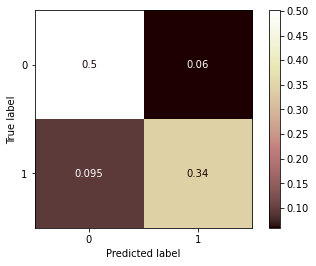

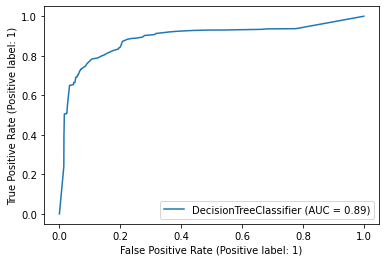

In [38]:

from sklearn import tree

params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}


clf = DecisionTreeClassifier(**params_dt)


clf.fit(X_train,y_train.ravel())
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
#time_taken = time.time()-t0

print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
#print("Time taken = {}".format(time_taken))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
plot_roc_curve(clf, X_test, y_test) 

pass

/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Accuracy = 0.7137742531567601
ROC Area under Curve = 0.6937522126776985
              precision    recall  f1-score   support

           0    0.69979   0.85782   0.77079     14573
           1    0.74458   0.52969   0.61901     11403

    accuracy                        0.71377     25976
   macro avg    0.72218   0.69375   0.69490     25976
weighted avg    0.71945   0.71377   0.70416     25976



/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


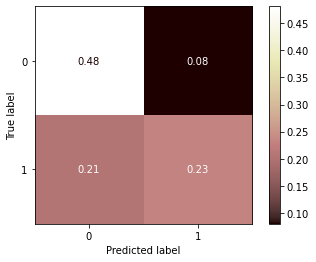

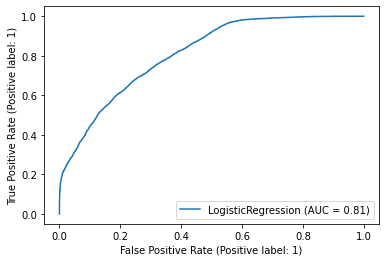

In [39]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

log = LogisticRegression(**params_lr)


log.fit(X_train,y_train.ravel())
y_pred = log.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
#time_taken = time.time()-t0

print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
#print("Time taken = {}".format(time_taken))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(log, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
plot_roc_curve(log, X_test, y_test) 

pass

Accuracy = 0.6940252540806898
ROC Area under Curve = 0.6606327057532325
              precision    recall  f1-score   support

           0    0.66076   0.93426   0.77406     14573
           1    0.82163   0.38700   0.52617     11403

    accuracy                        0.69403     25976
   macro avg    0.74120   0.66063   0.65012     25976
weighted avg    0.73138   0.69403   0.66524     25976



/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
/Users/emanuele/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


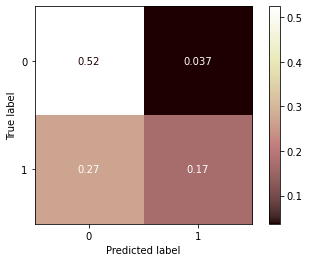

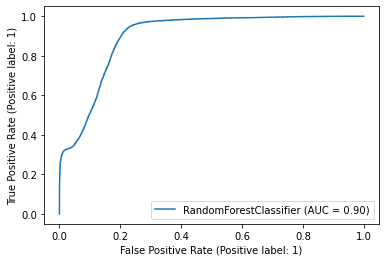

In [40]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)


model_rf.fit(X_train,y_train.ravel())
y_pred = model_rf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred) 
#time_taken = time.time()-t0

print("Accuracy = {}".format(accuracy))
print("ROC Area under Curve = {}".format(roc_auc))
#print("Time taken = {}".format(time_taken))
print(classification_report(y_test,y_pred,digits=5))
plot_confusion_matrix(model_rf, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
plot_roc_curve(model_rf, X_test, y_test) 

pass

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
scaler = StandardScaler()
features_n = ['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort']
X_train_n = scaler.fit_transform(df_train[features_n])
data = export_graphviz(DecisionTreeClassifier(max_depth=3).fit(X_train_n, y_train), out_file=None, 
                       feature_names = features_n,
                       class_names = ['Dissatisfied (0)', 'Satisfied (1)'], 
                       filled = True, rounded = True, special_characters = True)
# we have intentionally kept max_depth short here to accommodate the entire visual-tree, best result comes with max_depth = 12
# we have taken only really important features here to accommodate the entire tree picture
graph = graphviz.Source(data)
graph

KeyError: "None of [Index(['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding',\n       'Seat_comfort'],\n      dtype='object')] are in the [columns]"